In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [2]:
individual_2004 = pd.read_stata('Individual_t104.dta')

In [3]:
individual_2024 = pd.read_excel("usu_individual_T124.xlsx")

In [4]:
individual_2004[individual_2004["region"]=="Gran Buenos Aires"]

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,288171,1.0,3.0,0.0,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,08,,08,08,,09,0.0,0.0,0.0,00000
7643,288405,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000
7644,288405,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000
7645,288405,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000


In [5]:
individual_2024[individual_2024["REGION"]==1]

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
245,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,1,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
246,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,2,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
247,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,3,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
255,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1,1,1,1,S,33,2368,...,NaN,6,500000.0,9,NaN,9,9.0,NaN,9,3324
256,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1,1,1,1,S,33,1223,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46045,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,1,1,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46046,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,2,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46047,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,3,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46048,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,4,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [6]:
individual_2004.reset_index(inplace=True)
individual_GBA_2004 = individual_2004[individual_2004["region"]=="Gran Buenos Aires"]

In [7]:
individual_2024.reset_index(inplace=True)
individual_GBA_2024 = individual_2024[individual_2024["REGION"]==1]

In [8]:
edad_2004 = individual_GBA_2004['ch06']
edad_2004

0       79.0
1       67.0
2       74.0
3       54.0
4       51.0
        ... 
7642     1.0
7643    51.0
7644    55.0
7645    12.0
7646    22.0
Name: ch06, Length: 7647, dtype: category
Categories (99, object): ['Menos de 1 año' < 1.0 < 2.0 < 3.0 ... 95.0 < 96.0 < 97.0 < '98 y más años']

In [9]:
individual_GBA_2004[individual_GBA_2004["estado"]=="Ocupado"]

,index,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
1,1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,00,,00,00,,00,0.0,0.0,0.0,00000
3,3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,08,,08,08,,06,0.0,0.0,0.0,00000
5,5,125558,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,08,,08,08,,06,0.0,0.0,0.0,00000
6,6,125558,1.0,4.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,08,,08,08,,06,0.0,0.0,0.0,00000
7,7,125599,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,04,,04,04,,02,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7637,7637,287998,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,01,,01,01,,01,Tiene plan jefas y jefes,0.0,0.0,00000
7640,7640,288171,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,08,,08,08,,09,0.0,0.0,0.0,00000
7643,7643,288405,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,02,,02,02,,02,0.0,0.0,0.0,00000
7644,7644,288405,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,02,,02,02,,02,0.0,0.0,0.0,00000


In [10]:
individual_GBA_2004[individual_GBA_2004["estado"]=="Desocupado"]

,index,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
8,8,125599,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,04,,04,04,,02,0.0,0.0,0.0,00000
14,14,125783,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,03,,03,03,,01,0.0,0.0,0.0,00000
19,19,126175,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,10,,10,10,,08,0.0,0.0,0.0,00000
24,24,126225,1.0,4.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,10,,10,10,,09,0.0,0.0,0.0,00000
33,33,127045,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,04,,03,04,,01,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7536,7536,284974,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,08,,07,07,,08,0.0,0.0,0.0,00000
7586,7586,286364,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,01,,01,01,,01,0.0,0.0,0.0,00000
7609,7609,287100,1.0,4.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,02,,02,02,,02,0.0,0.0,0.0,00000
7635,7635,287810,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,08,,08,08,,09,0.0,0.0,0.0,00000


In [11]:
edad_2024 = individual_GBA_2024['CH06']
edad_2024

245      85
246      59
247      57
255      26
256      88
         ..
46045    43
46046    21
46047    20
46048    11
46049    24
Name: CH06, Length: 7051, dtype: int64

In [12]:
individual_GBA_2024[individual_GBA_2024["ESTADO"]==1]

,index,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
245,245,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,1,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
246,246,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,2,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
247,247,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,3,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
255,255,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1,1,1,1,S,33,...,NaN,6,500000.0,9,NaN,9,9.0,NaN,9,3324
271,271,TQRMNOQRXHLMQNCDEIJAH00855032,2024,1,1,1,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46036,46036,TQRMNORWVHLKOPCDEIIAD00861660,2024,1,1,3,1,1,S,32,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46040,46040,TQRMNOPSYHJLOQCDEIIAD00794774,2024,1,1,1,1,1,S,32,...,NaN,7,910000.0,10,NaN,10,10.0,NaN,10,1781
46043,46043,TQRMNOSXVHJKKMCDEIJAH00794775,2024,1,1,3,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46044,46044,TQRMNOSXVHJKKMCDEIJAH00794775,2024,1,1,4,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [13]:
individual_GBA_2024[individual_GBA_2024["ESTADO"]==2]

,index,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
540,540,TQRMNOQWQHLLKNCDEIJAH00855551,2024,1,1,1,1,1,S,33,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
925,925,TQRMNOPVUHMLPOCDEIJAH00802200,2024,1,1,2,1,1,S,33,...,NaN,6,156666.67,4,NaN,4,4.0,NaN,5,5092
1638,1638,TQRMNOPYTHJOQOCDEIJAH00802203,2024,1,1,2,1,1,S,33,...,NaN,9,200000.00,6,NaN,5,6.0,NaN,6,7558
1671,1671,TQRMNOSQXHJMQUCDEIJAH00855443,2024,1,1,5,1,1,S,33,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
1673,1673,TQRMNORVUHKOTNCDEIJAH00859157,2024,1,1,2,1,1,S,33,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,45458,TQRMNOSSVHKLNSCDEIIAD00861613,2024,1,1,1,1,1,S,32,...,NaN,1,185000.00,5,NaN,5,5.0,NaN,3,2078
45465,45465,TQRMNOQVYHLOLSCDEIJAH00855678,2024,1,1,2,1,1,S,33,...,NaN,6,250000.00,7,NaN,6,7.0,NaN,7,1941
45777,45777,TQRMNORSTHJOLTCDEIJAH00794561,2024,1,1,1,1,1,S,33,...,NaN,8,117142.86,3,NaN,3,3.0,NaN,3,6730
45843,45843,TQRMNOQXSHMMLOCDEIJAH00807671,2024,1,1,1,1,1,S,33,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0


In [14]:
estado_dict = {0: "Entrevista individual no realizada (no respuesta al cuestionario individual)", 1: "Ocupado", 2: "Desocupado", 3: "Inactivo", 4: "Menor de 10 años"} 
individual_GBA_2024["estado"] = individual_GBA_2024["ESTADO"].map(estado_dict)
individual_GBA_2024["estado"].dropna()

/tmp/ipykernel_149/687960334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["estado"] = individual_GBA_2024["ESTADO"].map(estado_dict)


245                                                Ocupado
246                                                Ocupado
247                                                Ocupado
255                                                Ocupado
256                                               Inactivo
                               ...                        
46045                                              Ocupado
46046    Entrevista individual no realizada (no respues...
46047    Entrevista individual no realizada (no respues...
46048    Entrevista individual no realizada (no respues...
46049    Entrevista individual no realizada (no respues...
Name: estado, Length: 7051, dtype: object

In [15]:
individual_GBA_2004["estado"].str.strip("0.0").dropna()

0               Inactivo
1                Ocupado
2               Inactivo
3                Ocupado
4               Inactivo
              ...       
7642    Menor de 10 años
7643             Ocupado
7644             Ocupado
7645            Inactivo
7646             Ocupado
Name: estado, Length: 7647, dtype: object

In [16]:
#Parte 1, Ejercicio 1
edad_2004_clean = edad_2004.copy()
edad_2004_clean = edad_2004_clean.replace("Menos de 1 año", 0)
edad_2004_clean = edad_2004_clean.replace("98 y más años", 99)  
edad2_2004 = pd.to_numeric(edad_2004_clean) ** 2
edad2_2004

0       6241.0
1       4489.0
2       5476.0
3       2916.0
4       2601.0
         ...  
7642       1.0
7643    2601.0
7644    3025.0
7645     144.0
7646     484.0
Name: ch06, Length: 7647, dtype: float64

In [17]:
edad_2024_clean = edad_2024.copy()  
edad2_2024 = pd.to_numeric(edad_2024_clean) ** 2
edad2_2024

245      7225
246      3481
247      3249
255       676
256      7744
         ... 
46045    1849
46046     441
46047     400
46048     121
46049     576
Name: CH06, Length: 7051, dtype: int64

/tmp/ipykernel_149/505344392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2004['edad_2004_numeric'] = pd.to_numeric(edad_2004_clean)
/tmp/ipykernel_149/505344392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2004['edad_2004_numeric'].replace([np.inf, -np.inf], np.nan, inplace=True)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

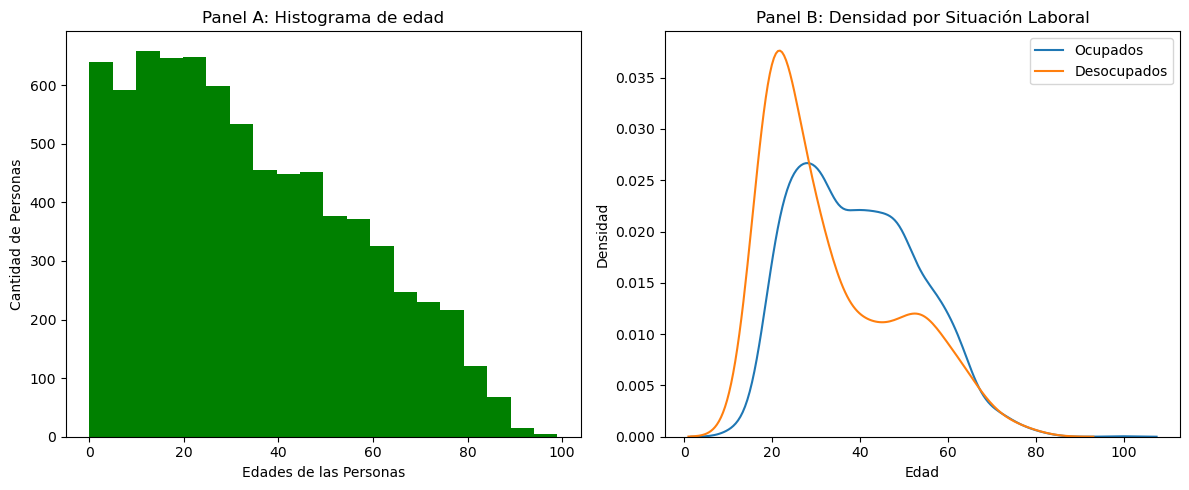

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Panel A: Histograma de edad
individual_GBA_2004['edad_2004_numeric'] = pd.to_numeric(edad_2004_clean)
individual_GBA_2004['edad_2004_numeric'].replace([np.inf, -np.inf], np.nan, inplace=True)
axes[0].hist(edad_2004_clean, bins=20, alpha=1, color='green')
axes[0].set_title("Panel A: Histograma de edad")
axes[0].set_xlabel('Edades de las Personas')
axes[0].set_ylabel('Cantidad de Personas')

# Panel B: Densidad para ocupados y desocupados
ocupados_data = individual_GBA_2004[individual_GBA_2004["estado"]=="Ocupado"]['edad_2004_numeric']
ocupados_data = ocupados_data.replace([np.inf, -np.inf], np.nan)
desocupados_data = individual_GBA_2004[individual_GBA_2004["estado"]=="Desocupado"]['edad_2004_numeric']
desocupados_data = desocupados_data.replace([np.inf, -np.inf], np.nan)
sns.kdeplot(ocupados_data, label='Ocupados', ax=axes[1])
sns.kdeplot(desocupados_data, label='Desocupados', ax=axes[1])
axes[1].set_title("Panel B: Densidad por Situación Laboral")
axes[1].set_xlabel("Edad")
axes[1].set_ylabel("Densidad")
axes[1].legend()
plt.savefig("gráfico ej 1 2004.png", bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

/tmp/ipykernel_149/3272933954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024['edad_2024_numeric'] = pd.to_numeric(edad_2024_clean)
/tmp/ipykernel_149/3272933954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024['edad_2024_numeric'].replace([np.inf, -np.inf], np.nan, inplace=True)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  wi

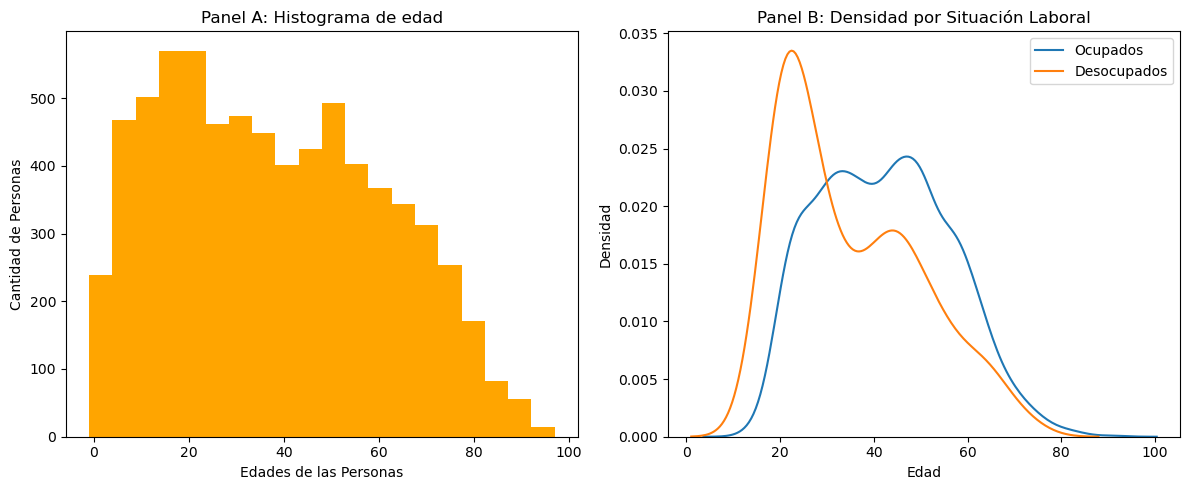

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Panel A: Histograma de edad
individual_GBA_2024['edad_2024_numeric'] = pd.to_numeric(edad_2024_clean)
individual_GBA_2024['edad_2024_numeric'].replace([np.inf, -np.inf], np.nan, inplace=True)
axes[0].hist(edad_2024_clean, bins=20, alpha=1, color='orange')
axes[0].set_title("Panel A: Histograma de edad")
axes[0].set_xlabel('Edades de las Personas')
axes[0].set_ylabel('Cantidad de Personas')

# Panel B: Densidad para ocupados y desocupados
ocupados_data = individual_GBA_2024[individual_GBA_2024["estado"]=="Ocupado"]['edad_2024_numeric']
ocupados_data = ocupados_data.replace([np.inf, -np.inf], np.nan)
desocupados_data = individual_GBA_2024[individual_GBA_2024["estado"]=="Desocupado"]['edad_2024_numeric']
desocupados_data = desocupados_data.replace([np.inf, -np.inf], np.nan)
sns.kdeplot(ocupados_data, label='Ocupados', ax=axes[1])
sns.kdeplot(desocupados_data, label='Desocupados', ax=axes[1])
axes[1].set_title("Panel B: Densidad por Situación Laboral")
axes[1].set_xlabel("Edad")
axes[1].set_ylabel("Densidad")
axes[1].legend()
plt.savefig("gráfico ej 1 2024.png", bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

In [20]:
#En el panel A del año 2004 podemos observar prácticamente que cuantos más años tienen, menos personas hay que contestaron, lo cual es lógico y esperable.
#Mientras que en el panel A pero del año 2024 podemos observar que por personas de 0 a 10 años se respondió mucho menos que en el 2004 y además podemos ver como personas de entre 45 a 55 años respondieron mucho más, por eso aparece esa gran suba. 

In [21]:
#En el panel B del año 2004 podemos observar que hay un gran número de desocupados en personas de entre 15 a 25 años, lo cual desciende fuertemente hasta las personas de entre 45 a 55 años que hay un ligero rebote para luego seguir descendiendo y converger con la curva de ocupados. Esta última tiene un comportamiento menos fuerte comenzando un gran ascenso a partir de los 18 años para llegar a un punto máximo en torno a los 30 años, para luego ir descencdiendo levemente hasta los 55 años y a partir de ahi una caída que converge con la de desocupados.
#Mientras que en el panel B pero del año 2024 podemos observar que la curva de desocupados se comporta de manera bastante similar a la curva del año 2004, teniendo una fuerte suba entre los 15 a 22 años alcanzando su punto máximo, para luego descender fuertemente hasta los 35 años donde hay un rebote hasta los 50 años donde vuelve a descender. Luego la curva de ocupados se comporta similr a la curva de ocupados del año 2004 pero esta tiene un punto máximo entre los 45 a 55 años par luego comenzar a descender. 

In [22]:
#Parte 1, Ejercicio 2
estado_dict = {1: "Jardín/ Preescolar", 2: "Primario", 3: "EGB", 4: "Secundario", 5: "Polimodal", 6: "Terciario", 7: "Universitario", 8: "Posgrado Univ.", 9: "Educación especial (discapacitado)"} 
individual_GBA_2024["ch12"] = individual_GBA_2024["CH12"].map(estado_dict)
individual_GBA_2024["ch12"].dropna()

/tmp/ipykernel_149/1425317245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["ch12"] = individual_GBA_2024["CH12"].map(estado_dict)


245           Primario
246      Universitario
247      Universitario
255      Universitario
256           Primario
             ...      
46045       Secundario
46046       Secundario
46047       Secundario
46048       Secundario
46049    Universitario
Name: ch12, Length: 6806, dtype: object

In [23]:
individual_GBA_2004["ch12"].str.strip("0.0").dropna()

0          Secundario
1            Primario
2            Primario
3            Primario
4       Universitario
            ...      
7641       Secundario
7643         Primario
7644         Primario
7645              EGB
7646       Secundario
Name: ch12, Length: 7110, dtype: object

In [24]:
estado_dict = {1: "Si", 2: "No", 3: "Ns./Nr."} 
individual_GBA_2024["ch13"] = individual_GBA_2024["CH13"].map(estado_dict)
individual_GBA_2024["ch13"].dropna()

/tmp/ipykernel_149/173489072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["ch13"] = individual_GBA_2024["CH13"].map(estado_dict)


245      Si
246      Si
247      Si
255      Si
256      No
         ..
46045    No
46046    No
46047    No
46048    No
46049    No
Name: ch13, Length: 6804, dtype: object

In [25]:
individual_GBA_2004["ch13"].str.strip("0.0").dropna()

0       No
1       Sí
2       Sí
3       Sí
4       Sí
        ..
7641    Sí
7643    Sí
7644    Sí
7645    No
7646    Sí
Name: ch13, Length: 7110, dtype: object

In [26]:
estado_dict = {0: "Ninguno", 1: "Primero", 2: "Segundo", 3: "Tercero", 4: "Cuarto", 5: "Quinto", 6: "Sexto", 7: "Séptimo", 8: "Octavo", 9: "Noveno", 98: "Educación especial", 99: "Ns./Nr."} 
individual_GBA_2024["ch14"] = individual_GBA_2024["CH14"].map(estado_dict)
individual_GBA_2024["ch14"].dropna()

/tmp/ipykernel_149/915775026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["ch14"] = individual_GBA_2024["CH14"].map(estado_dict)


256      Segundo
275      Primero
277      Segundo
278      Ninguno
401      Segundo
          ...   
46045    Ninguno
46046    Segundo
46047    Tercero
46048    Ninguno
46049    Segundo
Name: ch14, Length: 3365, dtype: object

In [27]:
individual_GBA_2004["ch14"].str.strip("0.0").dropna()

0        3
1         
2         
3         
4         
        ..
7642      
7643      
7644      
7645     6
7646      
Name: ch14, Length: 7647, dtype: object

In [50]:
nivel_dictado = {"Jardín/ Preescolar": 0, "Educación especial (discapacitado)": 0, "Primario": 3, "EGB": 3, "Secundario": 9, "Polimodal": 12, "Terciario": 15, "Universitario": 15, "Posgrado Univ.": 20}
año_dictado = {"Ninguno":0, "Primero": 1, "Segundo": 2, "Tercero": 3, "Cuarto": 4, "Quinto": 5, "Sexto": 6, "Séptimo": 7, "Octavo":8, "Noveno":9}
educ_2004_nivel_base = individual_GBA_2004["ch12"].map(nivel_dictado)
educ_2004_año_aprobado = individual_GBA_2004["ch14"].str.lower().map(año_dictado)
educ_2004 = pd.DataFrame({'nivel_base': educ_2004_nivel_base, 'año_aprobado': educ_2004_año_aprobado})
educ_2004['educ'] = educ_2004['nivel_base']
desc = educ_2004["educ"].describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
print(desc.rename({"50%": "p50"}))

mean     7.468516
std      4.706296
min      0.000000
p50      9.000000
max     15.000000
Name: educ, dtype: float64


In [29]:
nivel_dictado = {"Jardín/ Preescolar": 0, "Educación especial (discapacitado)": 0, "Primario": 3, "EGB": 3, "Secundario": 9, "Polimodal": 12, "Terciario": 15, "Universitario": 15, "Posgrado Univ.": 20}
año_dictado = {"Ninguno":0, "Primero": 1, "Segundo": 2, "Tercero": 3, "Cuarto": 4, "Quinto": 5, "Sexto": 6, "Séptimo": 7, "Octavo":8, "Noveno":9}
educ_2024_nivel_base = individual_GBA_2024["ch12"].map(nivel_dictado)
educ_2024_año_aprobado = individual_GBA_2024["ch14"].str.lower().map(año_dictado)
educ_2024 = pd.DataFrame({'nivel_base': educ_2024_nivel_base, 'año_aprobado': educ_2024_año_aprobado})
educ_2024['educ'] = educ_2024['nivel_base']
desc = educ_2024["educ"].describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
print(desc.rename({"50%": "p50"}))

mean     9.126653
std      4.795032
min      0.000000
p50      9.000000
max     20.000000
Name: educ, dtype: float64


In [30]:
#La media de años de educación formal del año 2004 es 7 años y medio aproximadamente, con una mediana de 9 años. El mínimo es 0, lo que indica personas sin educación formal, y el máximo es 15 años. La distribución muestra una gran dispersión, de aproximadamente un poco mas de 4 años y medio, reflejando diferentes niveles alcanzados por la población.
#En cambio La media de años de educación formal del año 2024 es un poco más de 9 años, con una mediana de 9 años. El mínimo es 0, lo que indica personas sin educación formal, y el máximo es 20 años. La distribución muestra una gran dispersión, de aproximadamente un poco mas de 4 años y medio, casi igual a la dispersión del año 2004.

In [31]:
#Parte 1, Ejercicio 3
coef_ajuste = 631.5
individual_GBA_2004["ingreso_ajustado"] = individual_GBA_2004["p21"] * coef_ajuste
individual_GBA_2004["salario_semanal"] = individual_GBA_2004["ingreso_ajustado"] / 40  
desc_salario = individual_GBA_2004["salario_semanal"].describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
print(desc_salario.rename({"50%": "p50"}))

mean      4154.583749
std      12988.422819
min          0.000000
p50          0.000000
max     852525.000000
Name: salario_semanal, dtype: float64


/tmp/ipykernel_149/3992619660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2004["ingreso_ajustado"] = individual_GBA_2004["p21"] * coef_ajuste
/tmp/ipykernel_149/3992619660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2004["salario_semanal"] = individual_GBA_2004["ingreso_ajustado"] / 40


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_149/2224366287.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False`

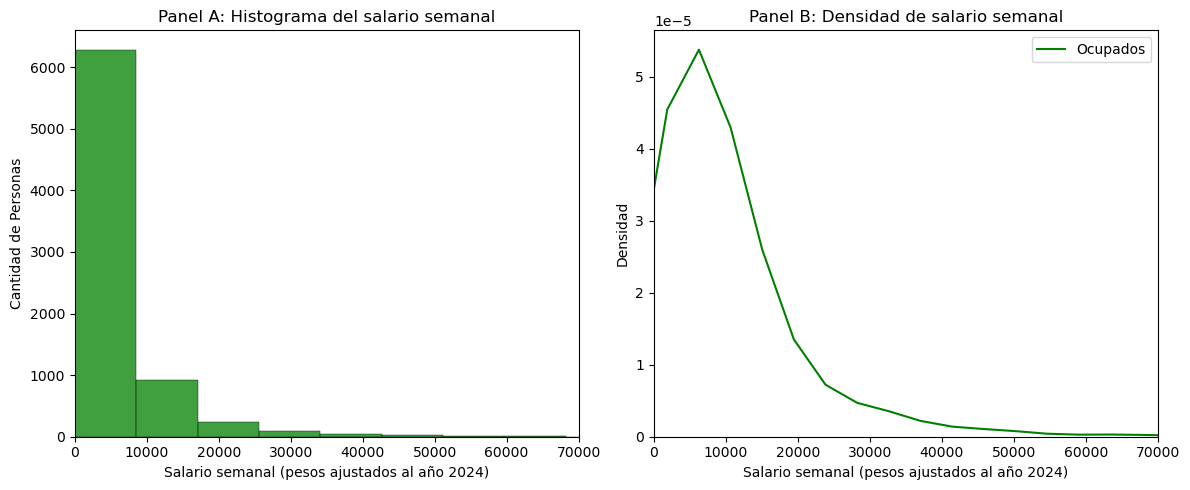

In [32]:
salario_semanal_2004 = individual_GBA_2004["salario_semanal"].dropna()
# Panel A: Histograma de salario semanal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(salario_semanal_2004, bins=100, kde=False, color="green")
plt.title("Panel A: Histograma del salario semanal")
plt.xlabel("Salario semanal (pesos ajustados al año 2024)")
plt.ylabel("Cantidad de Personas")
plt.xlim(0, 70000)

# Panel B: Kernel para ocupados vs desocupados
plt.subplot(1, 2, 2)
ocupados = individual_GBA_2004[individual_GBA_2004["estado"] == "Ocupado"]["salario_semanal"]
desocupados = individual_GBA_2004[individual_GBA_2004["estado"] == "Desocupado"]["salario_semanal"]
sns.kdeplot(ocupados.dropna(), label="Ocupados", color="green")
sns.kdeplot(desocupados.dropna(), label="Desocupados", color="red")
plt.title("Panel B: Densidad de salario semanal")
plt.xlabel("Salario semanal (pesos ajustados al año 2024)")
plt.ylabel("Densidad")
plt.xlim(0, 70000)
plt.legend()
plt.savefig("gráfico ej 3 2004.png", bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

In [33]:
individual_GBA_2024["salario_semanal"] = individual_GBA_2024["P21"] / 40  
desc_salario = individual_GBA_2024["salario_semanal"].describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
print(desc_salario.rename({"50%": "p50"}))

mean      3010.415494
std       7743.369171
min         -0.225000
p50          0.000000
max     200000.000000
Name: salario_semanal, dtype: float64


/tmp/ipykernel_149/660778752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["salario_semanal"] = individual_GBA_2024["P21"] / 40


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_149/323498339.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` 

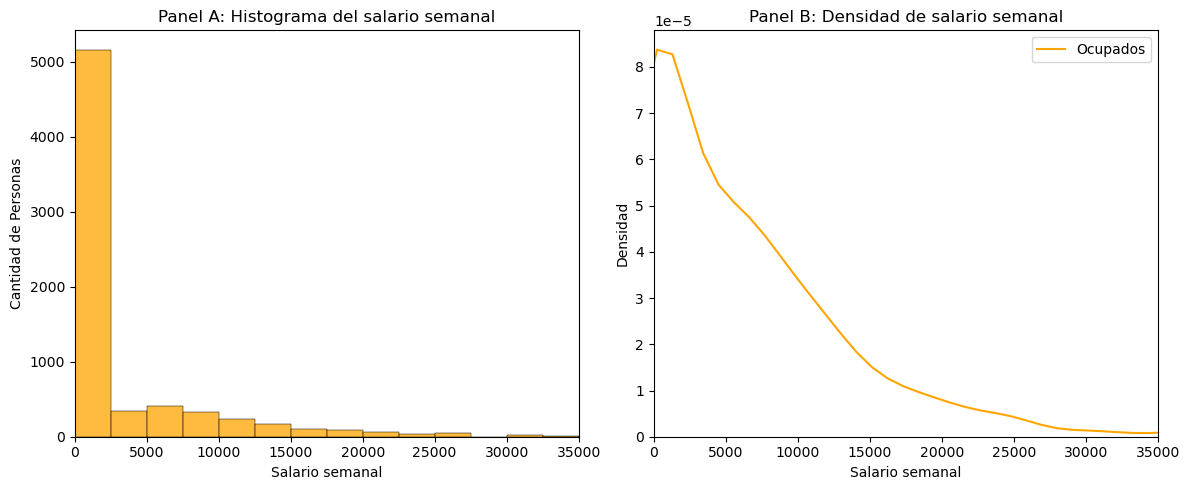

In [34]:
salario_semanal_2024 = individual_GBA_2024["salario_semanal"].dropna()
# Panel A: Histograma de salario semanal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(salario_semanal_2024, bins=80, kde=False, color="orange")
plt.title("Panel A: Histograma del salario semanal")
plt.xlabel("Salario semanal")
plt.ylabel("Cantidad de Personas")
plt.xlim(0, 35000)

# Panel B: Kernel para ocupados vs desocupados
plt.subplot(1, 2, 2)
ocupados = individual_GBA_2024[individual_GBA_2024["estado"] == "Ocupado"]["salario_semanal"]
desocupados = individual_GBA_2024[individual_GBA_2024["estado"] == "Desocupado"]["salario_semanal"]
sns.kdeplot(ocupados.dropna(), label="Ocupados", color="orange")
sns.kdeplot(desocupados.dropna(), label="Desocupados", color="red")
plt.title("Panel B: Densidad de salario semanal")
plt.xlabel("Salario semanal")
plt.ylabel("Densidad")
plt.xlim(0, 35000)
plt.legend()
plt.savefig("gráfico ej 3 2024.png", bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

In [35]:
#En el Panel A del año 2004 observamos que el promedio de las personas tienen un salario semanal de aproximadamente $4150, siendo convertidos a valores del año 2024, lo que indica una alta concentración en salarios muy bajos, viendose sesgado por la gente que no responde de manera cierta. Con una dispersión de casi $13000 y un monto máximo de $852525 lo cual provoca que el promedio sea tan superior. En el Panel B, la distribución de ocupados es practicamente identica al histograma de salario semanal, lo que quiere decir que los desocupados no respondieron.
#Mientras que en el Panel A del año 2024 se puede observar que el promedio de las personas tienen un salario semanal de aproximadamente $3010, lo que indica una alta concentración en salarios muy bajos, viendose sesgado por la gente que no responde de manera cierta. con una dispersión de $7743 aproximadamente y un monto máximo de $200000. En el Panel B, la distribución de ocupados es practicamente identica al histograma de salario semanal, lo que quiere decir que los desocupados no respondieron.

In [36]:
#Parte 1, ejercicio 4
horastrab_2004 = individual_GBA_2004["pp3e_tot"].fillna(0) + individual_GBA_2004["pp3f_tot"].fillna(0)
desc_horastrab = horastrab_2004.describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
desc_horastrab.rename({"50%": "p50"}, inplace=True)
print(desc_horastrab)

mean      18.271610
std       58.086405
min        0.000000
p50        0.000000
max     1044.000000
dtype: float64


In [37]:
horastrab_2024 = individual_GBA_2024["PP3E_TOT"].fillna(0) + individual_GBA_2024["PP3F_TOT"].fillna(0)
desc_horastrab = horastrab_2024.describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
desc_horastrab.rename({"50%": "p50"}, inplace=True)
print(desc_horastrab)

mean      19.969366
std       71.844935
min        0.000000
p50        0.000000
max     1998.000000
dtype: float64


In [38]:
#La cantidad de horas trabajadas por semana del año 2004, siendo la suma de las horas de la ocupacion principal y otras ocupaciones en promedio son un poco mas de 18hs, con una dispersión muy alta, siendo aproximadamente 58 hs y un máximo de 1044hs lo cual eleva el promedio, siendo una cantidad imposible. Mientras que la cantidad de horas trabajadas por semana del año 2024, siendo la suma de las horas de la ocupacion principal y otras ocupaciones en promedio son casi 20hs, con una dispersión más alta que en 2004, siendo casi 72 hs y un máximo superior de 1998hs lo cual eleva el promedio por mucho, siendo imposible ese número. 

In [39]:
#Parte 1, Ejercicio 5, limpieza y homogeneización de algunas variables más 
estado_dict = {1: "Varón", 2: "Mujer"} 
individual_GBA_2024["ch04"] = individual_GBA_2024["CH04"].map(estado_dict)
individual_GBA_2024["ch04"].dropna()

/tmp/ipykernel_149/237475307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["ch04"] = individual_GBA_2024["CH04"].map(estado_dict)


245      Mujer
246      Varón
247      Mujer
255      Varón
256      Mujer
         ...  
46045    Mujer
46046    Varón
46047    Varón
46048    Varón
46049    Mujer
Name: ch04, Length: 7051, dtype: object

In [40]:
individual_GBA_2004["ch04"].str.strip("0.0").dropna()

0       Varón
1       Mujer
2       Mujer
3       Varón
4       Mujer
        ...  
7642    Mujer
7643    Varón
7644    Mujer
7645    Mujer
7646    Varón
Name: ch04, Length: 7647, dtype: object

In [41]:
estado_dict = {1:"Unido", 2:"Casado", 3:"Separado o divorciado", 4:"Viudo", 5:"Soltero", 6:"Ns./Nr."  } 
individual_GBA_2024["ch07"] = individual_GBA_2024["CH07"].map(estado_dict)
individual_GBA_2024["ch07"].dropna()

/tmp/ipykernel_149/1204709875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["ch07"] = individual_GBA_2024["CH07"].map(estado_dict)


245                      Viudo
246                     Casado
247                     Casado
255                    Soltero
256                      Viudo
                 ...          
46045    Separado o divorciado
46046                  Soltero
46047                  Soltero
46048                  Soltero
46049                  Soltero
Name: ch07, Length: 7038, dtype: object

In [42]:
individual_GBA_2004["ch07"].str.strip("0.0").dropna()

0                       Viudo
1       Separado o divorciado
2                       Viudo
3                      Casado
4                      Casado
                ...          
7642                  Soltero
7643                   Casado
7644                   Casado
7645                  Soltero
7646                  Soltero
Name: ch07, Length: 7647, dtype: object

In [43]:
estado_dict = {1:"Obra social (incluye PAMI) ", 2:"Mutual / Prepaga / Servicio de emergencia", 3:"Planes y seguros públicos", 4:"No paga ni le descuentan", 9:"Ns./Nr.", 12:"Obra social y mutual / prepaga / servicio de emergencia", 13:"Obra social y Planes y Seguros Públicos", 23:"Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos", 123:"Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos "} 
individual_GBA_2024["ch08"] = individual_GBA_2024["CH08"].map(estado_dict)
individual_GBA_2024["ch08"].dropna()

/tmp/ipykernel_149/827278528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["ch08"] = individual_GBA_2024["CH08"].map(estado_dict)


245      Obra social (incluye PAMI) 
246      Obra social (incluye PAMI) 
247      Obra social (incluye PAMI) 
255      Obra social (incluye PAMI) 
256      Obra social (incluye PAMI) 
                    ...             
46045    Obra social (incluye PAMI) 
46046    Obra social (incluye PAMI) 
46047    Obra social (incluye PAMI) 
46048    Obra social (incluye PAMI) 
46049    Obra social (incluye PAMI) 
Name: ch08, Length: 7051, dtype: object

In [44]:
individual_GBA_2004["ch08"].str.strip("0.0").dropna()

0                  Obra social (incluye PAMI)
1                    No paga ni le descuentan
2                  Obra social (incluye PAMI)
3       Mutual/Prepaga/Servicio de emergencia
4       Mutual/Prepaga/Servicio de emergencia
                        ...                  
7642    Mutual/Prepaga/Servicio de emergencia
7643               Obra social (incluye PAMI)
7644               Obra social (incluye PAMI)
7645               Obra social (incluye PAMI)
7646               Obra social (incluye PAMI)
Name: ch08, Length: 7647, dtype: object

In [45]:
estado_dict = {1:"Jubilado/pensionado", 2:"Rentista", 3:"Estudiante", 4:"Ama de casa", 5:"Menor de 6 años", 6:"Discapacitado", 7:"Otros"} 
individual_GBA_2024["cat_inac"] = individual_GBA_2024["CAT_INAC"].map(estado_dict)
individual_GBA_2024["cat_inac"].dropna()

/tmp/ipykernel_149/1227610742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["cat_inac"] = individual_GBA_2024["CAT_INAC"].map(estado_dict)


256      Jubilado/pensionado
277               Estudiante
278          Menor de 6 años
403      Jubilado/pensionado
405      Jubilado/pensionado
                ...         
46033        Menor de 6 años
46037             Estudiante
46038             Estudiante
46039             Estudiante
46041    Jubilado/pensionado
Name: cat_inac, Length: 3475, dtype: object

In [46]:
individual_GBA_2004["cat_inac"].str.strip("0.0").dropna()

0       Jubilado/pensionado
2       Jubilado/pensionado
4               Ama de casa
9                Estudiante
10               Estudiante
               ...         
7636             Estudiante
7639             Estudiante
7641            Ama de casa
7642        Menor de 6 años
7645             Estudiante
Name: cat_inac, Length: 4030, dtype: object